<h1 align=center >Wildfire Prediction in Satellite Imagery</h1>

<br>

<img  src="https://raw.githubusercontent.com/doguilmak/Wildfire-Prediction-from-Satellite-Imagery/main/assets/wildfire_canada.png" width=1000  height=250 alt="github.com/doguilmak/Wildfire-Prediction-from-Satellite-Imagery"/>

<small>Picture Source: <a href="https://github.com/doguilmak/Wildfire-Prediction-from-Satellite-Imagery">Doğu İlmak GitHub</a></small>


<br>

<h2>Objectives</h2>

<p>Using <i>longitude</i> and <i>latitude</i> coordinates for each wildfire spot <i>(> 0.01 acres burned)</i> found on the dataset above we extracted satellite images of those areas using <b>MapBox API</b> to create a more convenient format of the dataset for <i>deep learning</i> and building a model that can predict whether an area is at <b>risk of a wildfire</b> or <b>not</b>.</p>

<br>

<h2>About Dataset</h2>

<p>This dataset contains satellite images <i>(350x350px)</i> in 2 classes:</p>

<ul>
  <li>Wildfire : 22710 images</li>
  <li>No wildfire : 20140 images</li>
</ul>

<p>The data was divided into train, test and validation with these percentages:</p>

<ul>
  <li>Train : ~70%</li>
  <li>Test : ~15%</li>
  <li>Validation : ~15%</li>
</ul>

<p>To download the dataset from Kaggle, you need to have a kaggle account.</p>
<ul>
 <li>Dataset download link: <a href='https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset/download?datasetVersionNumber=1'>Dataset</a></li>
 <li>Dataset on Kaggle: <a href='https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset'>Wildfire Prediction Dataset (Satellite Images)</a></li>
</ul>

<br>

<h2>Sources</h2>
<ul>
  <li><a href='https://open.canada.ca/data/en/dataset/9d8f219c-4df0-4481-926f-8a2a532ca003'>Refer to Canada's Website for the Original Wildfires Data (Forest Fires - Open Government Portal)</a>
  <li><a href='https://www.donneesquebec.ca/fr/licence/'>Original License For the Data (Creative Commons 4.0 Attribution (CC-BY) license – Quebec)</a></li>
</ul>

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ul>
      <li><a href="https://#unzip_data"> Unzip data</a></li>
      <li><a href="https://#auxiliary"> Imports and Auxiliary Function </a></li>
      <li><a href="https://#examine_files">Examine Files</a></li>
      <li><a href="https://#Display">Display and Analyze Image With No Trees</a></li>
  </ul>

  <br>

  <p>Estimated Time Needed: <strong>10 min</strong></p>

</div>

<br>

<h2 align=center id="unzip_data">Unzip Data</h2>
<p>After downloading the dataset, we can unzip the file.</p>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Colab Notebooks/AI Data/

/content/gdrive/MyDrive/Colab Notebooks/AI Data


In [5]:
!unzip -q archive.zip

<br>

<h2 align=center id="auxiliary">Imports and Auxiliary Function</h2>

<p>The following are the libraries we are going to use for this lab:</p>

In [6]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob

<p>We will use this function in the lab to plot:</p>

In [32]:
def show_data(data_sample, loop, class_name):
  for i in range(loop):
    image = Image.open(data_sample[i])
    plt.imshow(image)
    plt.title(f"y = {class_name}")
    plt.show()

<br>

<h2 align=center id="examine_files">Examine Files </h2>

<p>In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files.

The path to all the images are stored in the variable  <code>directory</code>.</p>

In [17]:
directory="/content/gdrive/MyDrive/Colab Notebooks/AI Data/train"

<p>The images which classified as wildfire and no wild fire are stored in the <b>wildfire</b> and <b>nowildfire</b> folders.</p>

In [14]:
wildfire='wildfire'

In [15]:
nowildfire="nowildfire"

<p>We can find the path to the file with all the negative images by  using the function <code>os.path.join</code>. We need the full path of the image so we join them.</p>

In [18]:
wildfire_file_path=os.path.join(directory, wildfire)
wildfire_files=[os.path.join(wildfire_file_path, file) for file in  os.listdir(wildfire_file_path) if file.endswith(".jpg")]
wildfire_files.sort()
wildfire_files[0:5]

['/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/wildfire/-57.11902,51.47242.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/wildfire/-57.8088,51.44634.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/wildfire/-58.657,51.1945.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/wildfire/-58.71402,51.32554.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/wildfire/-58.7312,51.2023.jpg']

In [19]:
nowildfire_file_path=os.path.join(directory, nowildfire)
nowildfire_files=[os.path.join(nowildfire_file_path, file) for file in os.listdir(nowildfire_file_path) if file.endswith(".jpg")]
nowildfire_files.sort()
nowildfire_files[0:5]

['/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/nowildfire/-113.917243,51.101323.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/nowildfire/-113.917264,50.966686.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/nowildfire/-113.917465,51.051057.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/nowildfire/-113.917555,51.071225.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/AI Data/train/nowildfire/-113.917557,51.165343.jpg']

<br>

<h2 align=center id="Display">Display and Analyze Images</h2>

<p>We can open an image by using the <code>Image</code> Module in the  <b>PIL</b> library, using the function open.</p>

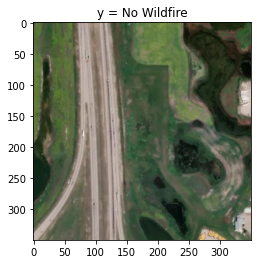

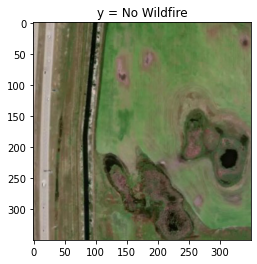

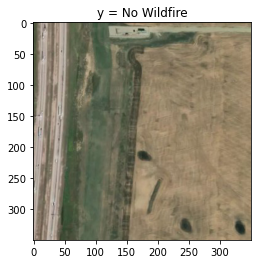

In [34]:
show_data(nowildfire_files, 3, 'No Wildfire')

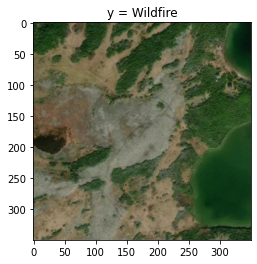

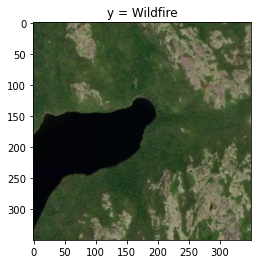

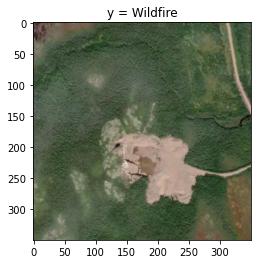

In [35]:
show_data(wildfire_files, 3, 'Wildfire')

<br>

<h2>Contact Me</h2>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [36]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-02-16 20:59:35
